In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
Birds_df = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week6-cluster/new_birds.csv')
Birds_df.head()

,Unnamed: 0,Name,category,family,genus,conservationStatus,aveWingLength,averageBodyMass,aveWingSpan
0,0,Black-bellied whistling-duck,Ducks/Geese/Waterfowl,Anatidae,Dendrocygna,LC,85.0,836.0,85.0
1,1,Fulvous whistling-duck,Ducks/Geese/Waterfowl,Anatidae,Dendrocygna,LC,89.0,881.0,89.0
2,2,Snow goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,150.0,3050.0,150.0
3,3,Ross's goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,114.5,1316.5,114.5
4,4,Greater white-fronted goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,147.5,2620.0,147.5


Creaing a b oxplot for the two important columns

<Axes: xlabel='averageBodyMass'>

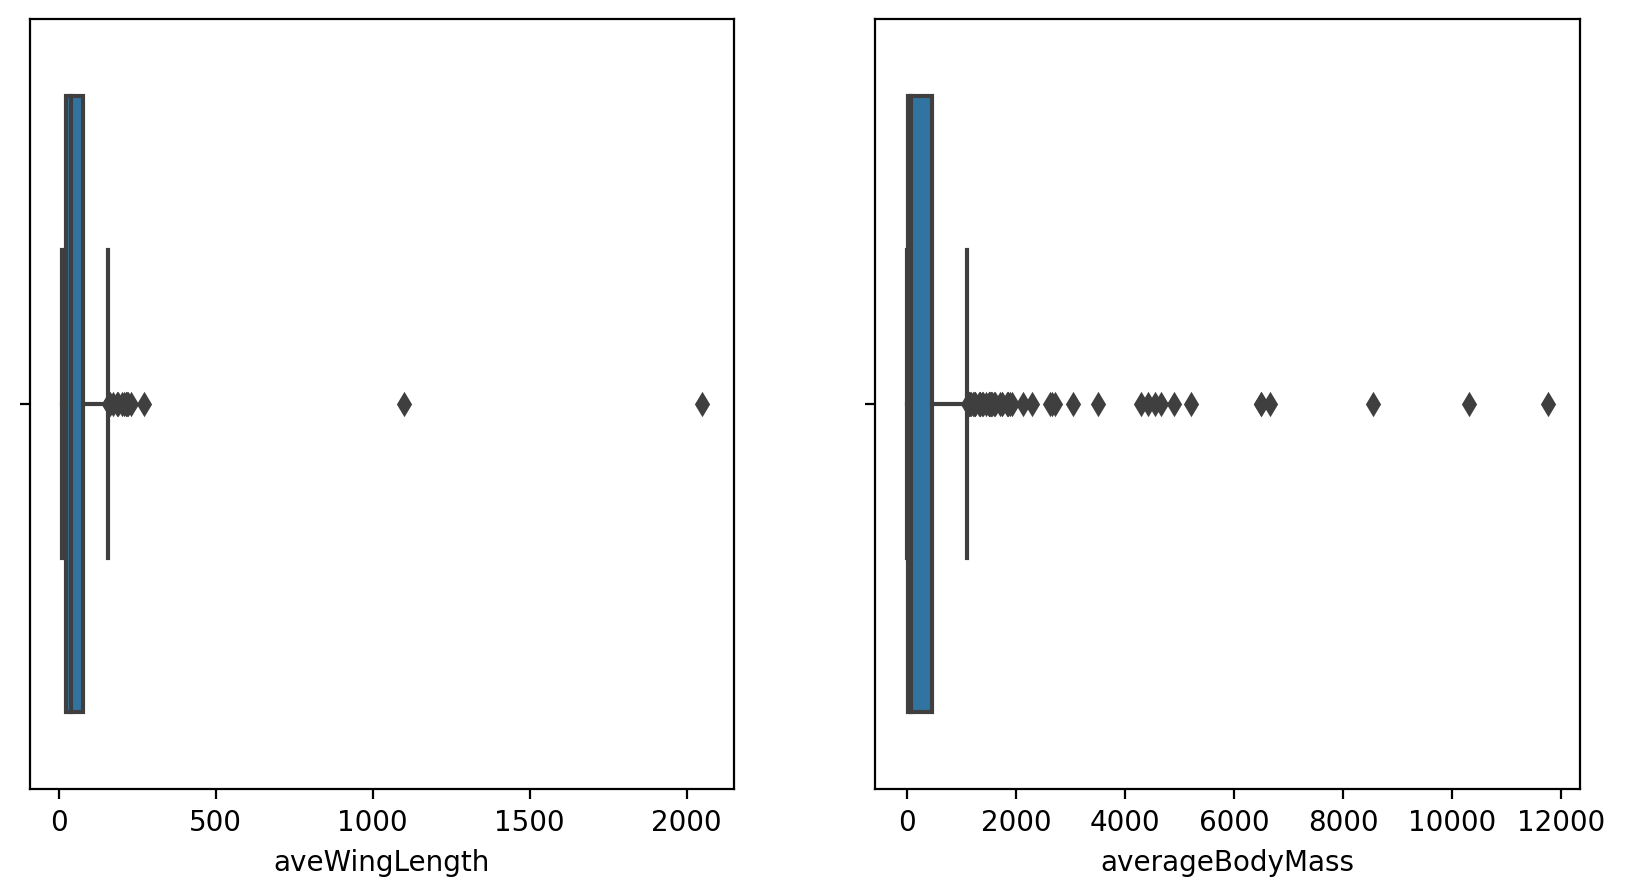

In [15]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(1,2,1)
sns.boxplot(x = 'aveWingLength', data = Birds_df)

plt.subplot(1,2,2)
sns.boxplot(x = 'averageBodyMass', data = Birds_df)


Now, let's choose the columns we will use for our clustering exercise. Pick ones with similar ranges and encode the category column as numeric data

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = Birds_df.loc[:, ('category','aveWingLength','averageBodyMass')]

y = Birds_df['category']

X['category'] = le.fit_transform(X['category'])

y = le.transform(y)

Now there is need to pick how many clusters to target. As we have 3 categories that we have carved out of the dataset, let's try 3 now

In [107]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y = y_cluster_kmeans

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [116]:
#We use make_blobs to create 3 synthetic clusters.

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X = Birds_df.loc[:, ('category','aveWingLength','averageBodyMass')]

y = Birds_df['category']

centers = [[836, 185,] [2620, 147] [32, 25]]
X, labels_true = make_blobs(
    n_samples=Birds_df, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 6], X[:, 7:])
plt.show()



<>:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_10684\4234109759.py:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  centers = [[836, 185,] [2620, 147] [32, 25]]
C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_10684\4234109759.py:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  centers = [[836, 185,] [2620, 147] [32, 25]]
C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_10684\4234109759.py:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  centers = [[836, 185,] [2620, 147] [32, 25]]
C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_10684\4234109759.py:10: SyntaxWarning: list indices must be integers or sl

TypeError: list indices must be integers or slices, not tuple

Let's use the array to calculate a 'silhouette score':

In [20]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.7588928225581426

**Build a model**

Kmeans is imported and start clustering proces. Some terms that required explaination are in the note 

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

We can use the "elbow method" to choose the appropriate number of k within a particular range as:

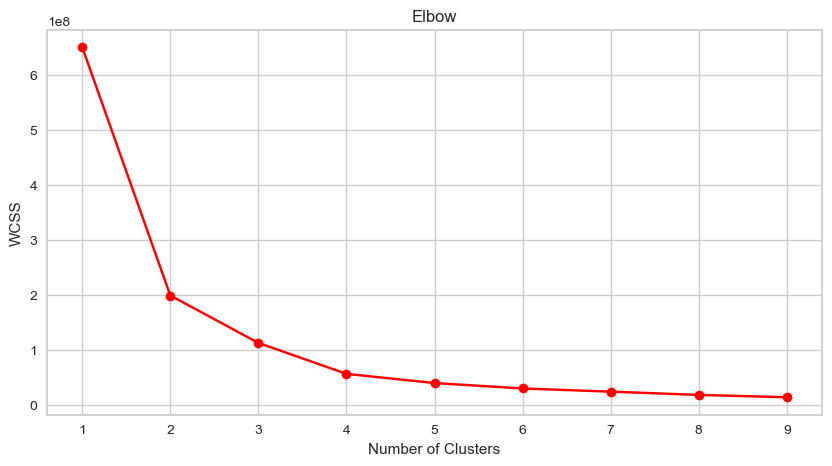

In [105]:
k = range(1,10)
plt.figure(figsize=(10,5))
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(k, wcss, marker='o',color='red')

In [108]:
'''from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()'''

'from yellowbrick.cluster import KElbowVisualizer\nmodel = KMeans()\n# k is range of number of clusters.\nvisualizer = KElbowVisualizer(model, k=(2,30), timings= True)\nvisualizer.fit(X)        # Fit data to visualizer\nvisualizer.show()'

Let’s find out about accuracy of the model

In [57]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 443 samples were correctly labeled.
Accuracy score: 0.00


Let's try to display kmeans cluster

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


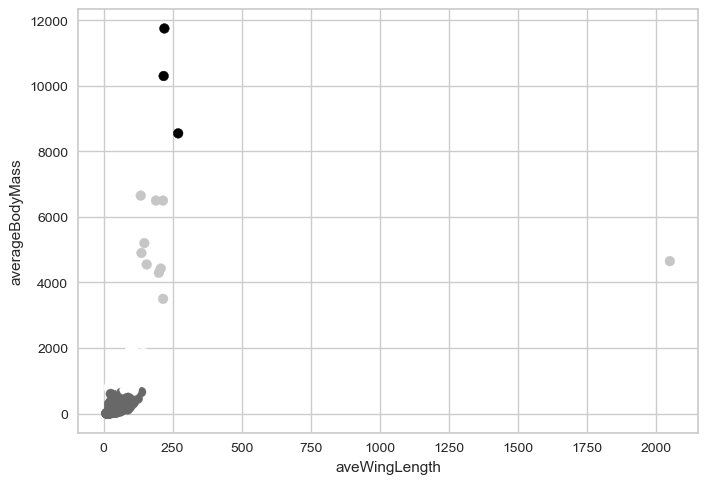

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(Birds_df['aveWingLength'],Birds_df['averageBodyMass'],c = labels)
plt.xlabel('aveWingLength')
plt.ylabel('averageBodyMass')
plt.show()

**Clustrng Process for Birds' Genus**

In [36]:
#choosing the appropriate columns
X1 = Birds_df.loc[:, ('genus','aveWingLength','averageBodyMass', 'aveWingSpan')]

y1 = Birds_df['genus']

X1['genus'] = le.fit_transform(X1['genus'])

y1 = le.transform(y1)

In [109]:
#picking only 3 clusters to target
nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X1)

# Predict the cluster for each data point

y1_cluster_kmeans = km.predict(X1)


c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [42]:
#Determine the silhouette_score
from sklearn import metrics
score = metrics.silhouette_score(X1, y1_cluster_kmeans)
score

0.7327452427947254

In [ ]:
# start the clustering process from kmeans
from sklearn.cluster import KMeans
wcss_genus = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 64)
    kmeans.fit(X1)
    wcss_genus.append(kmeans.inertia_)

In [60]:
#Checking the accuracy of the Model
labels = kmeans.labels_

correct_labels = sum(y1 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y1.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 443 samples were correctly labeled.
Accuracy score: 0.00


c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


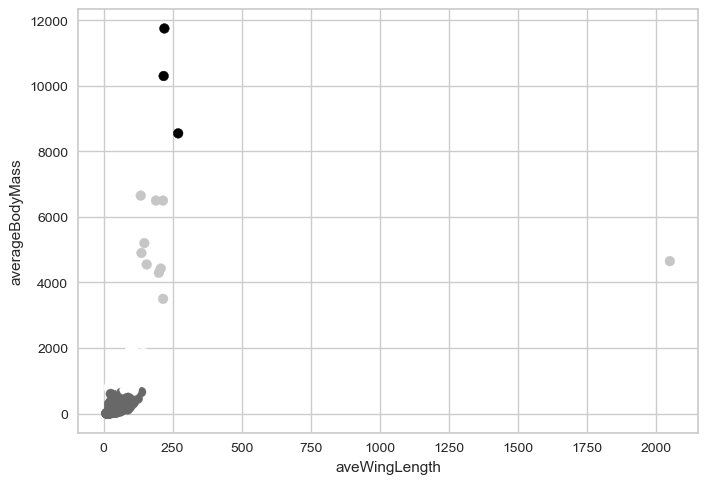

In [56]:
#Let's try to display kmeans cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X1)
labels = kmeans.predict(X1)
plt.scatter(Birds_df['aveWingLength'], Birds_df['averageBodyMass'], c = labels)
plt.xlabel('aveWingLength')
plt.ylabel('averageBodyMass')
plt.show()

**Clustering Process of birds' family**

In [63]:
#choosing the appropriate columns
X2 = Birds_df.loc[:, ('family','aveWingLength','averageBodyMass', 'aveWingSpan')]

y2 = Birds_df['family']

X2['family'] = le.fit_transform(X2['family'])

y2 = le.transform(y2)

In [66]:
#picking only 3 clusters to target
nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X2)

# Predict the cluster for each data point

y2_cluster_kmeans = km.predict(X2)


c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [67]:
#Determine the silhouette_score
from sklearn import metrics
score = metrics.silhouette_score(X2, y2_cluster_kmeans)
score

0.7589735306334925

In [ ]:
# start the clustering process from kmeans
from sklearn.cluster import KMeans
wcss_family = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 64)
    kmeans.fit(X2)
    wcss_family.append(kmeans.inertia_)

In [71]:
#Checking the accuracy of the Model
labels = kmeans.labels_

correct_labels = sum(y2 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y2.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y2.size)))

Result: 7 out of 443 samples were correctly labeled.
Accuracy score: 0.02


c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


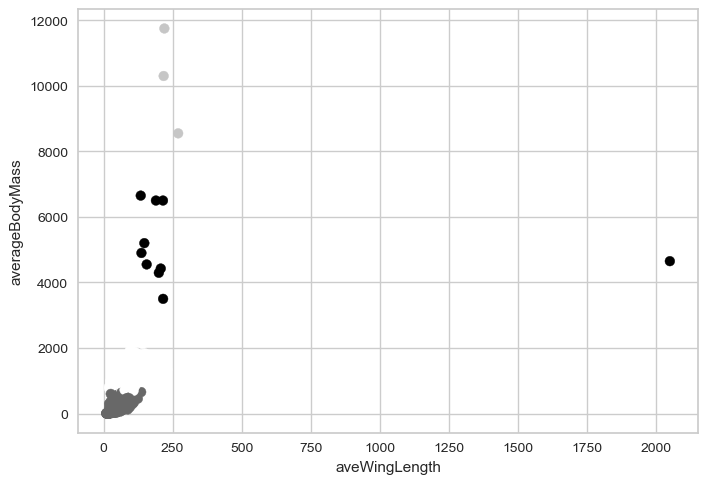

In [72]:
#Let's try to display kmeans cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X2)
labels = kmeans.predict(X2)
plt.scatter(Birds_df['aveWingLength'], Birds_df['averageBodyMass'], c = labels)
plt.xlabel('aveWingLength')
plt.ylabel('averageBodyMass')
plt.show()

**Clustering Process of birds' conservation status**

In [77]:
#choosing the appropriate columns
X3 = Birds_df.loc[:, ('conservationStatus','aveWingLength','averageBodyMass', 'aveWingSpan')]

y3 = Birds_df['conservationStatus']

X3['conservationStatus'] = le.fit_transform(X3['conservationStatus'])

y3 = le.transform(y3)

In [78]:
#picking only 3 clusters to target
nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X3)

# Predict the cluster for each data point

y3_cluster_kmeans = km.predict(X3)

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [79]:
#Determine the silhouette_score
from sklearn import metrics
score = metrics.silhouette_score(X3, y3_cluster_kmeans)
score

0.761964704159688

In [ ]:
# start the clustering process from kmeans
from sklearn.cluster import KMeans
wcss_conservation = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 64)
    kmeans.fit(X2)
    wcss_conservation.append(kmeans.inertia_)

Checking the accuracy of the Model

In [93]:
labels = kmeans.labels_

correct_labels = sum(y3 == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y3.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y3.size)))

Result: 5 out of 443 samples were correctly labeled.
Accuracy score: 0.01


c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


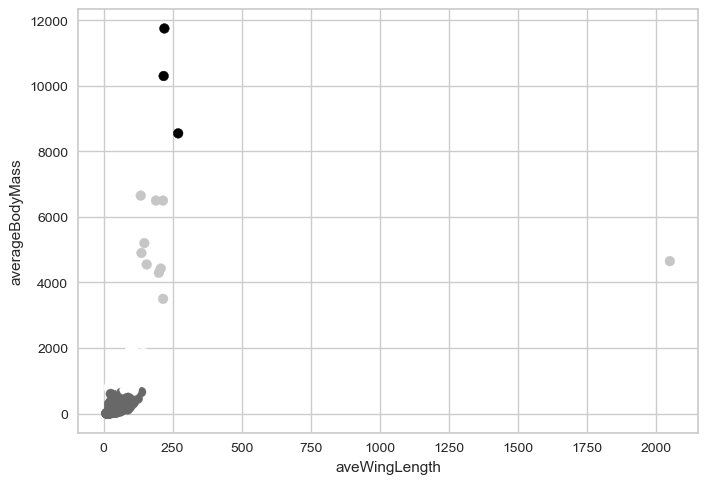

In [94]:
#Let's try to display kmeans cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X3)
labels = kmeans.predict(X3)
plt.scatter(Birds_df['aveWingLength'], Birds_df['averageBodyMass'], c = labels)
plt.xlabel('aveWingLength')
plt.ylabel('averageBodyMass')
plt.show()